In [0]:
# 사용할 라이브러리 불러오기
import numpy as np

# 숫자 -> One-hot Vector 를 위한 라이브러리
from keras.utils import np_utils

# CIFAR-10 Dataset을 가져오기 위한 라이브러리
from keras.datasets import cifar10, mnist

# 순차적인 모델을 만들기 위한 Sequential 함수
from keras.models import Sequential

# CNN 및 MLP에 필요한 각 층들
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten

# 드롭아웃 적용을 위한 층
from keras.layers import Dropout

# 배치 정규화 적용을 위한 층
from keras.layers import BatchNormalization

# L2 규제를 위한 라이브러리
from keras.regularizers import l2

# Google Colab에서 이미지를 보기 위한 cv2_imshow 함수
from google.colab.patches import cv2_imshow 

x_train : (50000, 32, 32, 3)
x_test : (10000, 32, 32, 3)


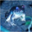

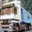

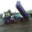

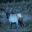

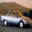

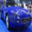

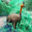

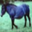

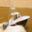

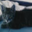

In [0]:
# CIFAR-10 Dataset 가져오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train :', np.shape(x_train))
print('x_test :', np.shape(x_test))

# 한 번 Training Dataset의 이미지 10개 정도 봅시다
for i in range(10):
  cv2_imshow(x_train[i])

In [0]:
# Loss의 스케일 조정을 위해 0 ~ 255 -> 0 ~ 1 범위로 만들어줍니다
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 이번엔 Test Dataset을 Validation Set으로 써봅니다

# One-Hot Encoding (숫자 -> One-Hot Vector) 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print('y_train :', np.shape(y_train))

y_train : (50000, 10)


In [0]:
# 모델 구성하기

# 높이, 너비, 채널(RGB) 설정
width = 32
height = 32
channel = 3

# 순차적 모델을 만들기 위한 Sequential() 함수
model = Sequential(name='CIFAR10_CNN_Upgraded')

# filters : Kernel 그룹의 갯수 / kernel_size : Kernel 크기
# padding : 'same'일 경우 입력과 출력 모양이 같도록 0을 주변에 덧댄다
# elu : ReLU 보다 발전된 형태의 활성화 함수 ELU를 써봅니다
# kernel_regularizer : 가중치 규제를 정해줄 수 있습니다. / l2(lambda) : 가중치의 L2 Norm을 목적 함수에 추가하며, lambda에 따라 곱해지는 상수값을 정합니다.
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001),
                 input_shape=(width, height, channel), activation='elu'))
model.add(BatchNormalization()) # BatchNormalization() : 배치 정규화를 위한 층을 추가합니다

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='elu'))
model.add(BatchNormalization())

# pool_size : MaxPooling 의 Window size
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2)) # Dropout(rate) : 앞의 층에 드롭아웃을 적용합니다. rate 값에 따라 없애고 학습할 노드 비율을 정합니다.

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='elu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='elu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# N차원 배열을 1차원으로 펴줍니다
model.add(Flatten())

# 출력층 MLP
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "CIFAR10_CNN_Upgraded"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64

In [0]:
# 모델 학습과정 설정하기

# loss : 목적 함수
# categorical_crossentropy : 분류가 2개 이상인 CEE
# optimizer : 학습 방법, Adam을 사용합니다.
# metrics : 학습 도중 화면에 어떤 값을 출력할지 결정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습시키기
# hist는 Epoch 당 학습 결과를 갖게 됩니다.
hist = model.fit(x_train, y_train,
                 epochs=30,
                 batch_size=32,
                 validation_data=(x_test, y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 54s 1ms/step - loss: 1.7157 - acc: 0.4853 - val_loss: 1.1851 - val_acc: 0.6238
Epoch 2/30
50000/50000 [==============================] - 51s 1ms/step - loss: 1.0884 - acc: 0.6567 - val_loss: 1.0336 - val_acc: 0.6715
Epoch 3/30
50000/50000 [==============================] - 52s 1ms/step - loss: 0.9236 - acc: 0.7128 - val_loss: 0.8988 - val_acc: 0.7322
Epoch 4/30
50000/50000 [==============================] - 51s 1ms/step - loss: 0.8249 - acc: 0.7541 - val_loss: 0.8497 - val_acc: 0.7501
Epoch 5/30
50000/50000 [==============================] - 52s 1ms/step - loss: 0.7640 - acc: 0.7777 - val_loss: 0.9257 - val_acc: 0.7359
Epoch 6/30
50000/50000 [==============================] - 52s 1ms/step - loss: 0.7260 - acc: 0.7943 - val_loss: 0.8432 - val_acc: 0.7651
Epoch 7/30
50000/50000 [=========

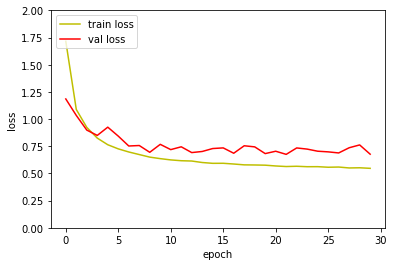

In [0]:
# 그래프를 그리기 위한 matplotlib 라이브러리
import matplotlib.pyplot as plt

# 그래프 왼쪽 상단의 loss_ax 설명
plt.plot(hist.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')

# loss_ax의 y축 범위 설정
plt.ylim([0.0, 2.0])

# 각 축의 이름 정하기
plt.xlabel('epoch')
plt.ylabel('loss')

# 각 그래프의 설명 위치 설정 후 표시
plt.legend(loc='upper left')

plt.show()

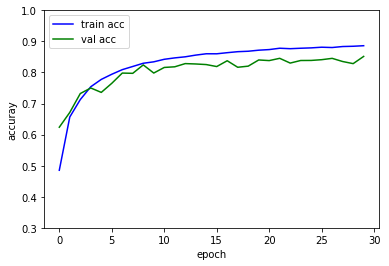

In [0]:
# 그래프 왼쪽 하단의 acc_ax 설명
plt.plot(hist.history['acc'], 'b', label='train acc')
plt.plot(hist.history['val_acc'], 'g', label='val acc')

# acc_ax의 y축 범위 설정
plt.ylim([0.3, 1.0])

# 각 축의 이름 정하기
plt.xlabel('epoch')
plt.ylabel('accuray')

# 각 그래프의 설명 위치 설정 후 표시
plt.legend(loc='upper left')

# 그래프 그리기
plt.show()

In [0]:
#모델 평가
loss_and_acc = model.evaluate(x_test, y_test, batch_size=32)
print('Test set Loss and Accuracy')
print(loss_and_acc)

10000/10000 [==============================] - 3s 258us/step
Test set Loss and Accuracy
[0.6771507740497589, 0.8517]


예측: 고양이 / 정답: 고양이


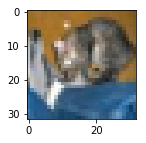

예측: 배 / 정답: 배


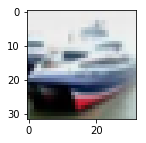

예측: 배 / 정답: 배


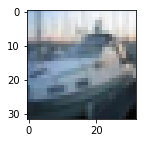

예측: 비행기 / 정답: 비행기


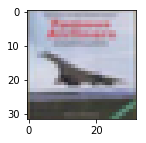

예측: 개구리 / 정답: 개구리


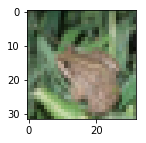

예측: 개구리 / 정답: 개구리


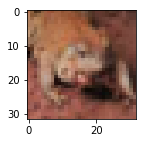

예측: 자동차 / 정답: 자동차


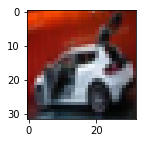

예측: 개구리 / 정답: 개구리


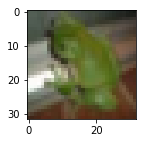

예측: 고양이 / 정답: 고양이


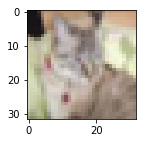

예측: 자동차 / 정답: 자동차


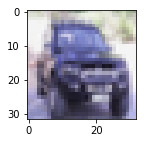

In [0]:
#모델 사용하기

# 이미지의 종류가 무엇인지에 대한 리스트
labels = ['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭']

# 출력 그림의 크기를 결정합니다.
plt.rcParams["figure.figsize"] = (2,2)

# Test Set의 10개를 맞추어 봅시다.
for i in range(10):
  # 모델 사용 
  output = model.predict(x_test[i].reshape(1,width, height, channel))
  
  # 이미지 출력
  plt.imshow(x_test[i].reshape(width, height, channel))

  # np.argmax()가 labels의 인덱스가 되어 labels 배열에 있는 문자열을 출력합니다.
  print('예측: ' + labels[np.argmax(output)] + ' / 정답: ' + labels[np.argmax(y_test[i])])
  plt.show()

In [0]:
# 본인의 구글 드라이브 → 지금 실행중인 코드

# google.colab.drive : 구글 드라이브에서 파일을 가져오기 위한 코드를 담고 있습니다
from google.colab import drive

# 본인의 구글 드라이브를 '/gdrive' 라는 경로로 하여 쓸 수 있습니다
drive.mount('/gdrive', force_remount=True)

KeyboardInterrupt: ignored

In [0]:
# 모델은 h5 파일 형태로 저장됩니다
# 경로에 주의합시다
model.save('/gdrive/My Drive/CIFAR10_CNN_Upgraded.h5')

# 모델을 불러오기 위해 지워줍니다
del model

# 저장되어 있는 모델을 불러오기 위한 load_model 함수
from keras.models import load_model

# 'model' 에 해당 모델을 불러옵니다
model = load_model('/gdrive/My Drive/CIFAR10_CNN_Upgraded.h5')